# PROJETO CARDÍACO

CRAIR UMA MAQUINA PREDITIVA QUE PREVER A PROBABILIDADE DE UMA PESSOA SOFRER UM ATAQUE CARDÍACO 

OBS: FAZER O DEPLOY DESSA MAQUINA PREDITIVA E ARMAZENAR OS DADOS DAS NOVAS PREVISÕES 
 

# IMPORTAÇÃO DE BIBLIOTECAS E ARQUIVOS

In [1]:
#Importação de pacotes
import warnings
import pandas as pd
df = pd.read_csv('ataquecardioca.csv')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import joblib # Utilizado para salvar o modelo preditivo
from sklearn.preprocessing import LabelEncoder #Utilizada para fazer o OneHotEncoding
from sklearn.metrics import mean_squared_error,precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from imblearn import under_sampling, over_sampling #Utilizada para fazer o balanceamento de dados
from imblearn.over_sampling import SMOTE #Utilizada para fazer o balanceamento de dados
from sklearn.metrics import r2_score # Utilizado para medir a acuracia do modelo preditivo
warnings.filterwarnings("ignore") 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.options.display.float_format = '{:.2f}'.format

In [2]:
df.head(1)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0


In [3]:
df.shape

(8763, 26)

# TRADUÇÃO DA BASE DE DADOS

In [4]:
# Mapeamento de colunas em inglês para português
colunas = {
    "Age": "Idade",
    "Sex": "Sexo",
    "Blood Pressure":"PressaoArterial",
    "Heart Rate": "FrequenciaCardiaca",
    "Diabetes": "Diabetes",
    "Family History": "HistoricoFamiliar",
    "Smoking": "Fumar",
    "Obesity": "Obesidade",
    "Alcohol Consumption": "ConsumoAlcool",
    "Exercise Hours Per Week": "HorasExercicios",
    "Diet": "Dieta",
    "Previous Heart Problems": "ProblemasCardiacosAnteriores",
    "Medication Use": "UsoMedicacao",
    "Stress Level": "NivelEstresse",
    "Sedentary Hours Per Day": "HorasSedentarias",
    "Income": "Renda",
    "BMI": "IMC",
    "Triglycerides": "Triglicerides",
    "Physical Activity Days Per Week": "AtividadeFisica",
    "Sleep Hours Per Day": "HorasSono",
    "Country": "Pais",
    "Continent": "Continente",
    "Hemisphere": "Hemisferio",
    "Heart Attack Risk": "AtaqueCardiaco"
}

# Renomear as colunas no DataFrame
df = df.rename(columns=colunas)

# Verificar as primeiras linhas do DataFrame para confirmar as mudanças
df.head()


,Patient ID,Idade,Sexo,Cholesterol,PressaoArterial,FrequenciaCardiaca,Diabetes,HistoricoFamiliar,Fumar,Obesidade,ConsumoAlcool,HorasExercicios,Dieta,ProblemasCardiacosAnteriores,UsoMedicacao,NivelEstresse,HorasSedentarias,Renda,IMC,Triglicerides,AtividadeFisica,HorasSono,Pais,Continente,Hemisferio,AtaqueCardiaco
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


# MANIPULAÇÃO E TRATEMENTO DE DADOS

### EXCLUINDO COLUNAS NÃO IMPORTANTE

In [5]:
del df['Patient ID']

### VERIFICANDO VALORES NULOS E DUPLICADOS 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Idade                         8763 non-null   int64  
 1   Sexo                          8763 non-null   object 
 2   Cholesterol                   8763 non-null   int64  
 3   PressaoArterial               8763 non-null   object 
 4   FrequenciaCardiaca            8763 non-null   int64  
 5   Diabetes                      8763 non-null   int64  
 6   HistoricoFamiliar             8763 non-null   int64  
 7   Fumar                         8763 non-null   int64  
 8   Obesidade                     8763 non-null   int64  
 9   ConsumoAlcool                 8763 non-null   int64  
 10  HorasExercicios               8763 non-null   float64
 11  Dieta                         8763 non-null   object 
 12  ProblemasCardiacosAnteriores  8763 non-null   int64  
 13  Uso

In [7]:
(df.isnull().sum() / len(df['Idade']))*100

Idade                           0.0
Sexo                            0.0
Cholesterol                     0.0
PressaoArterial                 0.0
FrequenciaCardiaca              0.0
Diabetes                        0.0
HistoricoFamiliar               0.0
Fumar                           0.0
Obesidade                       0.0
ConsumoAlcool                   0.0
HorasExercicios                 0.0
Dieta                           0.0
ProblemasCardiacosAnteriores    0.0
UsoMedicacao                    0.0
NivelEstresse                   0.0
HorasSedentarias                0.0
Renda                           0.0
IMC                             0.0
Triglicerides                   0.0
AtividadeFisica                 0.0
HorasSono                       0.0
Pais                            0.0
Continente                      0.0
Hemisferio                      0.0
AtaqueCardiaco                  0.0
dtype: float64

In [8]:
df.duplicated().sum()

0

# ANÁLISE EXPLORATÓRIA

### ESTATÍSTICA

In [9]:
df.describe()

,Idade,Cholesterol,FrequenciaCardiaca,Diabetes,HistoricoFamiliar,Fumar,Obesidade,ConsumoAlcool,HorasExercicios,ProblemasCardiacosAnteriores,UsoMedicacao,NivelEstresse,HorasSedentarias,Renda,IMC,Triglicerides,AtividadeFisica,HorasSono,AtaqueCardiaco
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### MODA

In [10]:
from statistics import mode

mode(df['Idade'])

90

In [11]:

mode(df['Cholesterol'])

235

In [12]:

mode(df['FrequenciaCardiaca'])

94

In [13]:

mode(df['Diabetes'])

1

In [14]:

mode(df['Fumar'])

1

In [15]:

mode(df['HistoricoFamiliar'])

0

In [16]:

mode(df['Obesidade'])

1

In [17]:

mode(df['HorasExercicios'])

4.168188835442079

In [18]:

mode(df['Dieta'])

'Healthy'

In [19]:

mode(df['ProblemasCardiacosAnteriores'])

0

In [20]:

mode(df['UsoMedicacao'])

0

In [21]:

mode(df['NivelEstresse'])

2

In [22]:

mode(df['HorasSedentarias'])

6.61500145291406

In [23]:

mode(df['Renda'])

225278

In [24]:

mode(df['IMC']) 

31.2512327252954

In [25]:
mode(df['Triglicerides'])

799

In [26]:
mode(df['AtividadeFisica'])

3

In [27]:

mode(df['HorasExercicios']) 

4.168188835442079

In [28]:
mode(df['HorasSono'])

10

In [29]:
mode(df['AtaqueCardiaco'])

0

In [30]:
df.describe()

,Idade,Cholesterol,FrequenciaCardiaca,Diabetes,HistoricoFamiliar,Fumar,Obesidade,ConsumoAlcool,HorasExercicios,ProblemasCardiacosAnteriores,UsoMedicacao,NivelEstresse,HorasSedentarias,Renda,IMC,Triglicerides,AtividadeFisica,HorasSono,AtaqueCardiaco
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


### ASSIMETRIA

In [31]:
df['Idade'].skew()

0.028497567159389177

In [32]:
df['Cholesterol'].skew()

-0.0009547396917188247

In [33]:
df['FrequenciaCardiaca'].skew()

-0.0032271858873562757

In [34]:
df['HorasExercicios'].skew()

-0.016387022492201274

In [35]:
df['NivelEstresse'].skew()

0.00838895813855685

In [36]:
df['HorasSedentarias'].skew()

0.017974371497112458

In [37]:
df['Renda'].skew()

0.0217916598114287

In [38]:
df['IMC'].skew()

0.035996421727897285

In [39]:
df['Triglicerides'].skew()

-0.0019149561400361435

In [40]:
df['AtividadeFisica'].skew()

0.017821706108678493

In [41]:
df['HorasSono'].skew()

0.0003568517457889658

### HISTOGRAMA

array([[<Axes: title={'center': 'Idade'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'FrequenciaCardiaca'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'HistoricoFamiliar'}>,
        <Axes: title={'center': 'Fumar'}>,
        <Axes: title={'center': 'Obesidade'}>,
        <Axes: title={'center': 'ConsumoAlcool'}>],
       [<Axes: title={'center': 'HorasExercicios'}>,
        <Axes: title={'center': 'ProblemasCardiacosAnteriores'}>,
        <Axes: title={'center': 'UsoMedicacao'}>,
        <Axes: title={'center': 'NivelEstresse'}>],
       [<Axes: title={'center': 'HorasSedentarias'}>,
        <Axes: title={'center': 'Renda'}>,
        <Axes: title={'center': 'IMC'}>,
        <Axes: title={'center': 'Triglicerides'}>],
       [<Axes: title={'center': 'AtividadeFisica'}>,
        <Axes: title={'center': 'HorasSono'}>,
        <Axes: title={'center': 'AtaqueCardiaco'}>, <Axes: >]],
      dtype=object)

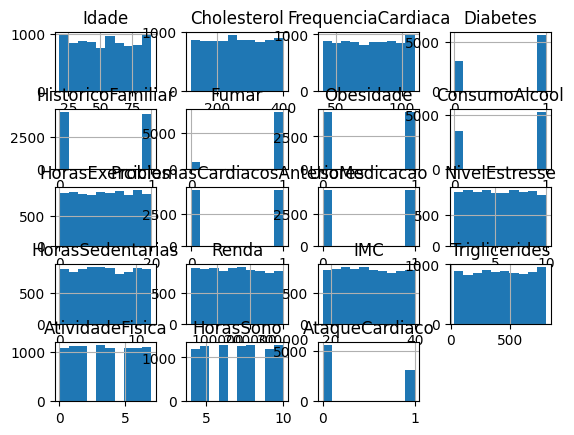

In [42]:
df.hist()

### VERIFICANDO SE HÁ CORRELAÇÃO NAS VARIAVEIS

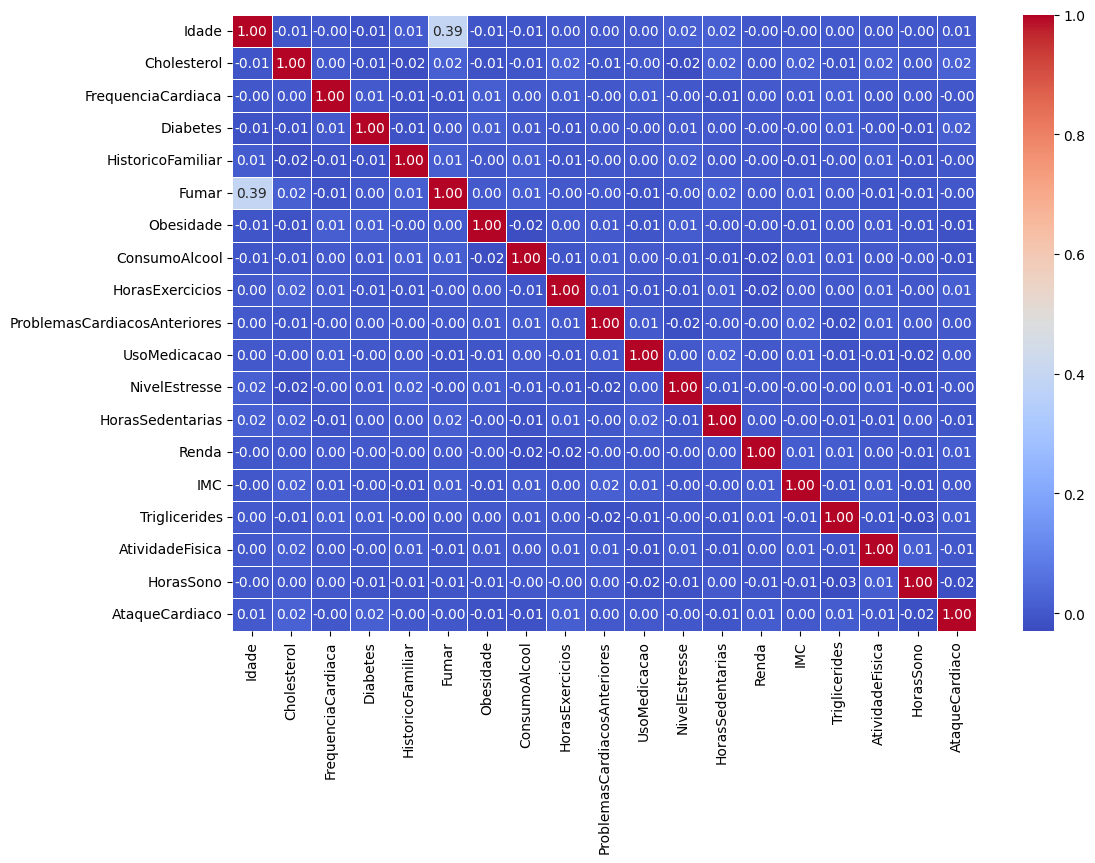

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 8))

# Criar o heatmap com melhor formatação
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Exibir o gráfico
plt.show()


### VALORES ÚNICO EM CADA VARIAVEL

In [44]:
valores_unicos = []
for i in df.columns[0:25].tolist():
    print(i, ':', len(df[i].astype(str).value_counts()))
    valores_unicos.append(len(df[i].astype(str).value_counts()))

Idade : 73
Sexo : 2
Cholesterol : 281
PressaoArterial : 3915
FrequenciaCardiaca : 71
Diabetes : 2
HistoricoFamiliar : 2
Fumar : 2
Obesidade : 2
ConsumoAlcool : 2
HorasExercicios : 8763
Dieta : 3
ProblemasCardiacosAnteriores : 2
UsoMedicacao : 2
NivelEstresse : 10
HorasSedentarias : 8763
Renda : 8615
IMC : 8763
Triglicerides : 771
AtividadeFisica : 8
HorasSono : 7
Pais : 20
Continente : 6
Hemisferio : 2
AtaqueCardiaco : 2


## verificação de outliers 

Idade : int64
Cholesterol : int64
FrequenciaCardiaca : int64
Diabetes : int64
HistoricoFamiliar : int64
Fumar : int64
Obesidade : int64
ConsumoAlcool : int64
HorasExercicios : float64
ProblemasCardiacosAnteriores : int64
UsoMedicacao : int64
NivelEstresse : int64
HorasSedentarias : float64
Renda : int64
IMC : float64
Triglicerides : int64
AtividadeFisica : int64
HorasSono : int64
AtaqueCardiaco : int64


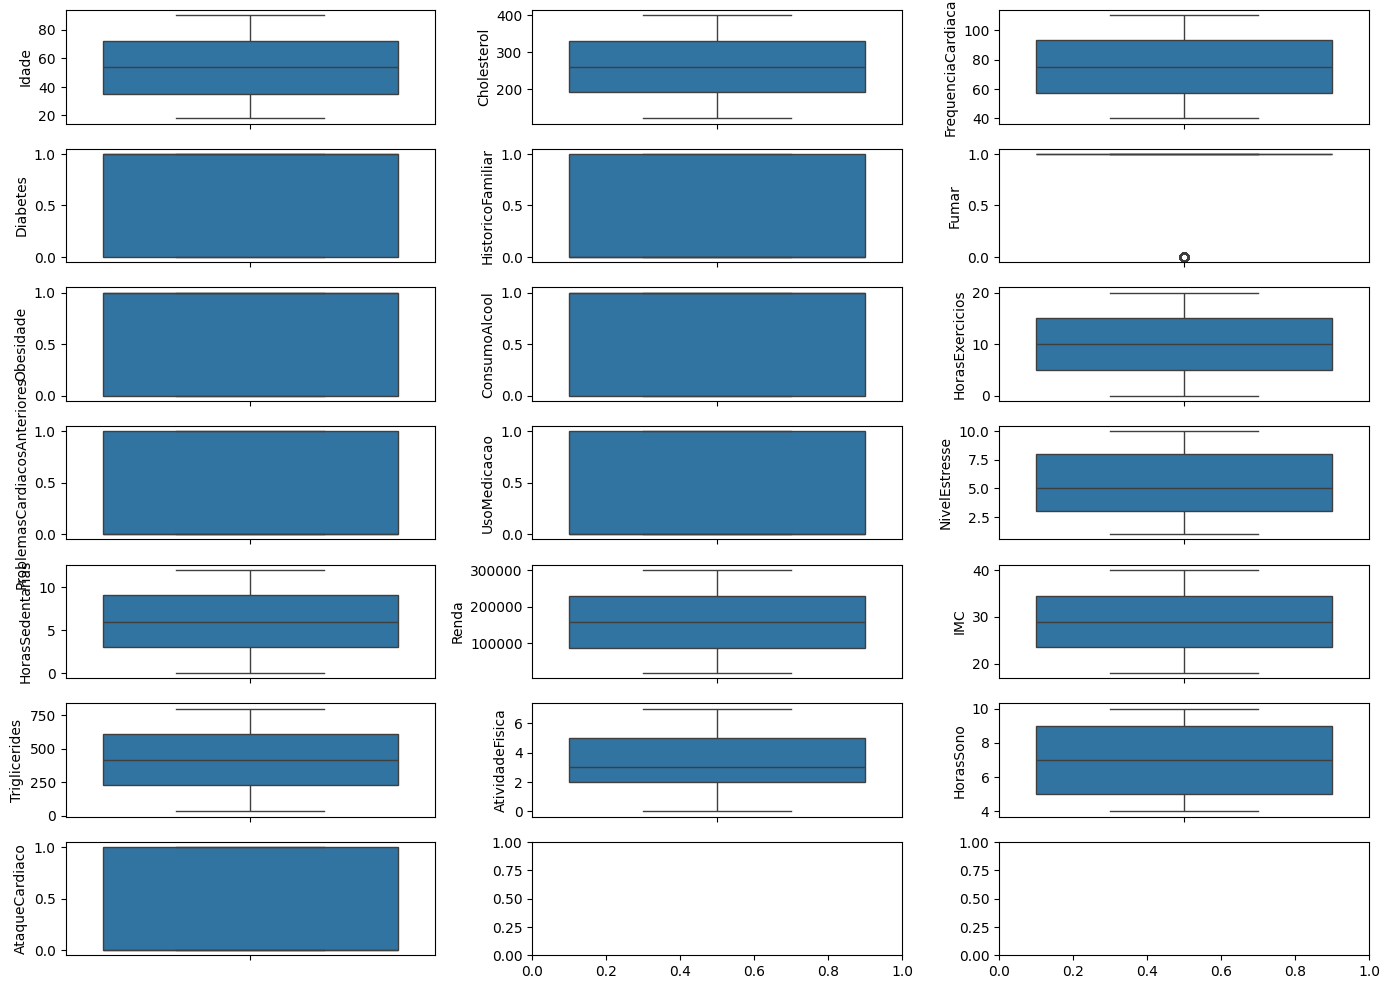

In [45]:
variaveis_numericas = []
for i in df.columns[0:25].tolist():
        if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':            
            print(i, ':' , df.dtypes[i]) 
            variaveis_numericas.append(i)
 
    
    
    
plt.rcParams["figure.figsize"] = [14.00, 10.00]
plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 10 
plt.rcParams['axes.titlesize'] = 20

f, axes = plt.subplots(7, 3) #8 linhas e 4 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0            

plt.show() 

# ANÁLISE DE DADOS

In [46]:
df.head(1)

,Idade,Sexo,Cholesterol,PressaoArterial,FrequenciaCardiaca,Diabetes,HistoricoFamiliar,Fumar,Obesidade,ConsumoAlcool,HorasExercicios,Dieta,ProblemasCardiacosAnteriores,UsoMedicacao,NivelEstresse,HorasSedentarias,Renda,IMC,Triglicerides,AtividadeFisica,HorasSono,Pais,Continente,Hemisferio,AtaqueCardiaco
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0


### AGRUPAMENTO DE DADOS

In [47]:
df.groupby(df['Diabetes']).size()

Diabetes
0    3047
1    5716
dtype: int64

In [48]:
df.groupby(df['HistoricoFamiliar']).size()

HistoricoFamiliar
0    4443
1    4320
dtype: int64

In [49]:
df.groupby(df['Fumar']).size()

Fumar
0     904
1    7859
dtype: int64

In [50]:
df.groupby(df['Obesidade']).size()

Obesidade
0    4369
1    4394
dtype: int64

In [51]:
df.groupby(df['ConsumoAlcool']).size()

ConsumoAlcool
0    3522
1    5241
dtype: int64

In [52]:
df.groupby(df['UsoMedicacao']).size()

UsoMedicacao
0    4396
1    4367
dtype: int64

In [53]:
df.groupby(df['NivelEstresse']).size()

NivelEstresse
1     865
2     913
3     868
4     910
5     860
6     855
7     903
8     879
9     887
10    823
dtype: int64

In [54]:
df.groupby(df['AtividadeFisica']).size()

AtividadeFisica
0    1065
1    1121
2    1109
3    1143
4    1077
5    1079
6    1074
7    1095
dtype: int64

In [55]:
df.groupby(df['HorasSono']).size()

HorasSono
4     1181
5     1263
6     1276
7     1270
8     1288
9     1192
10    1293
dtype: int64

In [56]:
df.groupby(df['AtaqueCardiaco']).size()

AtaqueCardiaco
0    5624
1    3139
dtype: int64

### PLOTANDO EM UM GRAFICO

# MACHINE LEARNING

## PRÉ-PROCESSAMENTO

In [57]:
df.head(1)

,Idade,Sexo,Cholesterol,PressaoArterial,FrequenciaCardiaca,Diabetes,HistoricoFamiliar,Fumar,Obesidade,ConsumoAlcool,HorasExercicios,Dieta,ProblemasCardiacosAnteriores,UsoMedicacao,NivelEstresse,HorasSedentarias,Renda,IMC,Triglicerides,AtividadeFisica,HorasSono,Pais,Continente,Hemisferio,AtaqueCardiaco
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0


### EXCLUIR VARIAVÉIS QUE NÃO FORAM BOAS PARA O MODELO

In [58]:
del df['Pais']
del df['Continente']
del df['Hemisferio']
del df['Dieta']
del df['Sexo']
del df['PressaoArterial']
del df['Diabetes']
del df['HistoricoFamiliar']
del df['Renda']
del df['Obesidade']
del df['ProblemasCardiacosAnteriores']
del df['UsoMedicacao']
del df['HorasSedentarias']
del df['Fumar']
del df['HorasSono']
del df['HorasExercicios']

### Separa X e y

In [59]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [60]:
X.head(1)

,Idade,Cholesterol,FrequenciaCardiaca,ConsumoAlcool,NivelEstresse,IMC,Triglicerides,AtividadeFisica
0,67,208,72,0,9,31.251233,286,0


In [61]:
y.head(1)

0    0
Name: AtaqueCardiaco, dtype: int64

### FAZENDO O BALANCEAMENTO DAS VARIAVÉIS

Contagem de classes antes do balanceamento:
AtaqueCardiaco
0    5624
1    3139
Name: count, dtype: int64

Contagem de classes após o balanceamento:
AtaqueCardiaco
0    5624
1    5624
Name: count, dtype: int64


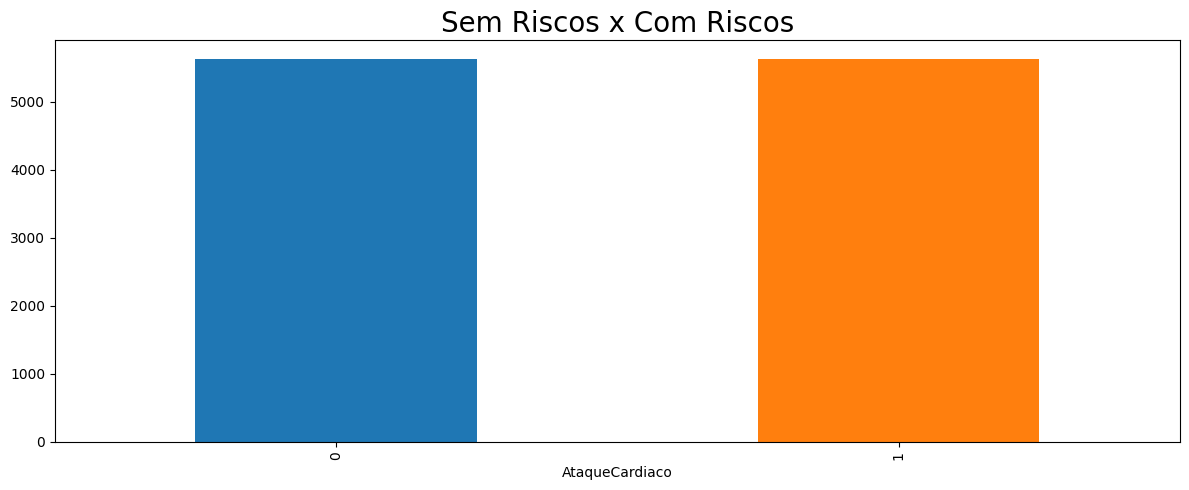

In [62]:
# Seed para reproduzir o mesmo resultado
seed = 100
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

# Verifica a contagem de classes antes do balanceamento
print("Contagem de classes antes do balanceamento:")
print(y.value_counts())

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

# Verifica a contagem de classes após o balanceamento
print("\nContagem de classes após o balanceamento:")
print(pd.Series(y_res).value_counts())


# Visualizando o balanceamento da variável TARGET
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_res.value_counts().plot(kind='bar', title='Sem Riscos x Com Riscos',color = ['#1F77B4', '#FF7F0E']);

### VARIAVEIS MAIS IMPORTANTES

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

# Criação do Modelo - Feature Selection
#modelo = ExtraTreesClassifier()
#modelo.fit(X, y)

In [64]:
# Print dos Resultados
#print(df.columns[0:10])
#print(modelo.feature_importances_)

### TREINANDO O MODELO V

In [65]:
# SEPRANDO AS VARIAVEIS PARA TREINAMENTO

# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)

In [66]:
from xgboost import XGBClassifier

# Criando o modelo
modelo1 = XGBClassifier()

# Treinando o modelo
modelo1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [67]:
y_pred = modelo1.predict(X_test)
previsoes = [round(value) for value in y_pred]

In [68]:
#Using confusion matrix to find the accuracy
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)

accuracy = cm.diagonal().sum()/cm.sum()

print("\n---------------------------\n")
print("Accuracy of Predictions = ",accuracy)

print("\n---------------------------\n")
print(classification_report(y_test, y_pred))
print(cm)


---------------------------

Accuracy of Predictions =  0.6217777777777778

---------------------------

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1120
           1       0.62      0.64      0.63      1130

    accuracy                           0.62      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.62      0.62      0.62      2250

[[675 445]
 [406 724]]


In [69]:
df.tail(1)

,Idade,Cholesterol,FrequenciaCardiaca,ConsumoAlcool,NivelEstresse,IMC,Triglicerides,AtividadeFisica,AtaqueCardiaco
8762,25,356,75,1,8,32.914151,180,7,1


### FAZENDO NOVAS PREVISÔES 

In [70]:
import numpy as np

# Substitua os valores abaixo pelos valores reais
Idade = 25
Cholesterol = 356
FrequenciaCardiaca = 75
ConsumoAlcool = 1  # 1 se consumir álcool, 0 caso contrário
NivelEstresse = 8  # Escala de 1 a 5
IMC = 32.91
Triglicerides = 180
AtividadeFisica = 1


# Crie um array numpy com os valores dos parâmetros
parametros = np.array([[Idade,Cholesterol, FrequenciaCardiaca,ConsumoAlcool,
                        NivelEstresse,IMC, Triglicerides, AtividadeFisica]])

# Agora faça a previsão usando o modelo
fazendo_previsao = modelo1.predict(parametros)
probabilidade = modelo1.predict_proba(parametros)

# Imprima os resultados
if (fazendo_previsao == 0).any():
    print('NÃO TEM RISCO DE ATAQUE CARDÍACO')
    print('Probabilidade:', probabilidade)
else:
    print('TEM RISCO DE ATAQUE CARDÍACO')
    print('Probabilidade:', probabilidade)


TEM RISCO DE ATAQUE CARDÍACO
Probabilidade: [[0.3334183 0.6665817]]


### SALVAR O MODELO PARA POR EM PRODUÇÃO

In [72]:
#Comando de Salvamento da Máquina Preditiva
import pickle 
pickle_out = open("maquina_preditiva_doenca_cardiaca.pkl", mode = "wb") 
pickle.dump(modelo1, pickle_out) 
pickle_out.close() 